In [110]:
# imported modules
import tweepy # for accessing the twitter api
import numpy as np
import matplotlib.pyplot as plot # for plotting graphs
import pandas as pd # for building data frames
import csv #Import csv

%matplotlib inline

In [111]:
# Twitter API keys-- please remove these if you're pushing to GitHub.
# see https://apps.twitter.com/

# consumer keys
TWITTER_CONSUMER_KEY = 'Ny126tei6203OIPiHVlHC86C4'
TWITTER_CONSUMER_SECRET = 'G2OGIalFhjiFw763i98RHLieeiP81Ed1gGAvlRNH1UwJVJQvPa'

# access keys
TWITTER_ACCESS_TOKEN = '15672073-ZqvD1dILS4hQRZQNctMoVe3PZNi3M7WgUcTsptmAc'
TWITTER_ACCESS_SECRET = 'i3rrSGAI8hz5txdUATvgmy1q1UgDafri0PtcW7EqQtmjc'

In [112]:
def twitter_setup():
    """
    Utility to set up an application using
    the Twitter API
    """
    auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET) # sets up OAuth
    auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_SECRET) # sets up access
    
    return tweepy.API(auth)

In [113]:
# Quick test to see if it works
USER_TO_SLURP = 'mirpedrona' # note: case sensitive

api = twitter_setup()
tweets = api.user_timeline(USER_TO_SLURP, count=200)

print("Number of tweets slurped from @{}: {}".format(USER_TO_SLURP, len(tweets)))

# the below is just for looking at the attributes available for a Tweet object
print(dir(tweets[0]))


Number of tweets slurped from @mirpedrona: 22
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [114]:
print(tweets[0])

Status(_api=<tweepy.api.API object at 0x1a16c41898>, _json={'created_at': 'Fri Jan 05 05:25:53 +0000 2018', 'id': 949149932874752000, 'id_str': '949149932874752000', 'text': '¡Para mí!Súper sorteo de 4 tarjetas de regalo de Repsol! gracias a #HappyWeeksAppMiVodafone https://t.co/eYBgmKg1yv', 'truncated': False, 'entities': {'hashtags': [{'text': 'HappyWeeksAppMiVodafone', 'indices': [67, 91]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/eYBgmKg1yv', 'expanded_url': 'http://bit.ly/HappyWeeksVF29', 'display_url': 'bit.ly/HappyWeeksVF29', 'indices': [92, 115]}]}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2565067900, 'id_str': '2565067900', 'name': 'Pedrona Mir', 'screen_name': 'MirPedrona', 'location': 'sa pobla ', 'description': 'Llicen

In [115]:
# adding tweets to a DataFrame
dataset = pd.DataFrame(data = [tweet.text for tweet in tweets], columns=['Tweets'])
dataset.head(10) # showing ten most recent

,Tweets
0,¡Para mí!Súper sorteo de 4 tarjetas de regalo ...
1,RT @trobing: objecto perdido - CUSSETA - Carre...
2,"@BonomoSabri , enhorabuena!!! Que gran alegria..."
3,RT @BonomoSabri: Ahora si esta lista! 💪 https:...
4,Entrevista al DIARIO DE MALLORCA #pedronareto ...
5,". Busco silla de ruedas, en buen estado y esco..."
6,@elcorteinglesac sólo han pasado 10 dias des d...
7,@elcorteinglesac el punto 6.1 de la base de da...
8,@elcorteinglesac @pumuky62. No recibi nungun t...
9,"@elcorteinglesac, acabo de ver el tweet. Hay a..."


In [116]:
# adding more pertinent details to the dataset
dataset['len'] = np.array([len(tweet.text) for tweet in tweets]) # length of tweet
dataset['ID'] = np.array([tweet.id for tweet in tweets]) # unique tweet id
dataset['Date'] = np.array([tweet.created_at for tweet in tweets])
dataset['Source'] = np.array([tweet.source for tweet in tweets]) # client used to post
dataset['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
dataset['RTs'] = np.array([tweet.retweet_count for tweet in tweets])
dataset['screen_name'] = np.array([tweet.user.screen_name for tweet in tweets])
dataset['coordinates'] = np.array([tweet.coordinates for tweet in tweets])

dataset.head(10) # showing ten most recent

,Tweets,len,ID,Date,Source,Likes,RTs,screen_name,coordinates
0,¡Para mí!Súper sorteo de 4 tarjetas de regalo ...,115,949149932874752000,2018-01-05 05:25:53,Twitter for Android,0,0,MirPedrona,None
1,RT @trobing: objecto perdido - CUSSETA - Carre...,138,776773073706086400,2016-09-16 13:21:47,Twitter for Android,0,2,MirPedrona,None
2,"@BonomoSabri , enhorabuena!!! Que gran alegria...",60,773988112208957441,2016-09-08 20:55:20,Twitter for Android,1,0,MirPedrona,None
3,RT @BonomoSabri: Ahora si esta lista! 💪 https:...,63,773987754208292864,2016-09-08 20:53:55,Twitter for Android,0,323,MirPedrona,None
4,Entrevista al DIARIO DE MALLORCA #pedronareto ...,118,724900732260982785,2016-04-26 09:59:37,Twitter for Android,3,0,MirPedrona,None
5,". Busco silla de ruedas, en buen estado y esco...",76,606117571012775936,2015-06-03 15:17:44,Twitter for Android,0,0,MirPedrona,None
6,@elcorteinglesac sólo han pasado 10 dias des d...,137,570310494701137922,2015-02-24 19:53:12,Twitter for Android,0,0,MirPedrona,None
7,@elcorteinglesac el punto 6.1 de la base de da...,126,570310230288048129,2015-02-24 19:52:09,Twitter for Android,0,0,MirPedrona,None
8,@elcorteinglesac @pumuky62. No recibi nungun t...,133,570304138766106626,2015-02-24 19:27:57,Twitter for Android,0,0,MirPedrona,None
9,"@elcorteinglesac, acabo de ver el tweet. Hay a...",137,570295928252469251,2015-02-24 18:55:19,Twitter for Android,0,0,MirPedrona,None


In [117]:
likes = dataset[dataset.screen_name == USER_TO_SLURP].sort_values('Likes', ascending=False)
likes.head(10)

,Tweets,len,ID,Date,Source,Likes,RTs,screen_name,coordinates


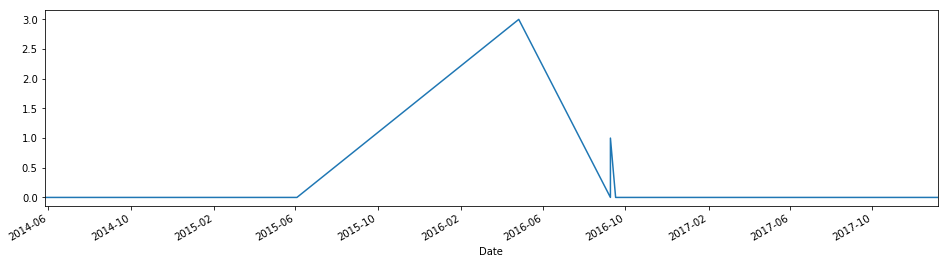

In [118]:
tLikes = pd.Series(data=dataset['Likes'].values, index=dataset['Date'])
tLikes.plot(figsize=(16,4))

In [119]:
top = dataset[dataset.screen_name == USER_TO_SLURP].sort_values('RTs', ascending=False) # showing most RTs
top.head(10)

,Tweets,len,ID,Date,Source,Likes,RTs,screen_name,coordinates


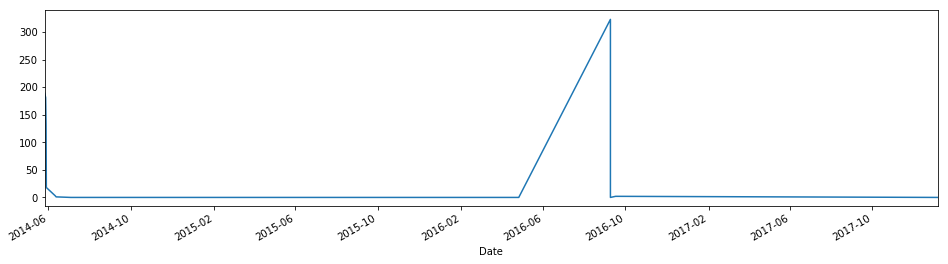

In [120]:
tRTs = pd.Series(data=dataset['RTs'].values, index=dataset['Date'])
tRTs.plot(figsize=(16,4))

In [132]:
hashtag = '#mallorca'
hashTweetsCursor = tweepy.Cursor(api.search, q=hashtag).items(100)
hashTweets = []

# Open/create a file to append data to
csvFile = open('result.csv', 'a')

#Use csv writer
csvWriter = csv.writer(csvFile)

for tweet in hashTweetsCursor:
   #print (tweet.created_at, tweet.text, tweet.lang)
    # Write a row to the CSV file. I use encode UTF-8
    #csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
    #print (tweet.created_at, tweet.text)
    hashTweets.append(tweet)

print(len(hashTweets))
csvFile.close()

100


In [126]:
# Create a function to convert a given list of tweets into a Pandas DataFrame.
# The DataFrame will consist of only the values, which I think might be useful for analysis...


def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet 
    in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet 
    in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]


    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet 
    in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet 
    in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet 
    in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet 
    in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet 
    in tweets]

    return DataSet

#Pass the tweets list to the above function to create a DataFrame
hashDataSet = toDataFrame(hashTweets)
# Let's check the top 5 records in the Data Set
hashDataSet.head(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,963834550618083333,RT @lostesdefran: ¿Quién se va a ver @Juliaenl...,5,0,Twitter for Android,2018-02-14 17:57:18,49888297,jcenrique,Juan Carlos Enrique,2009-06-23 04:49:52,"Hago radio en Atresmedia. Dirijo Onda Cero, Eu...",2099,1540,"Palma de Mallorca, Spain",Madrid
1,963834299802882049,RT IMEPalma: https://t.co/0XzoNxTS4D #Mallorca...,0,0,IFTTT,2018-02-14 17:56:18,768022853350465536,Informatico_PM,InformaticoPalmadeMa,2016-08-23 09:51:32,Informático a domicilio Palma de Mallorca.Prob...,5628,6148,"Palma, España",Madrid
2,963833822080053248,RT @Informatico_PM: RT ajuntpalma: https://t.c...,1,0,Twitter for Android,2018-02-14 17:54:25,957281933100281856,mallorcahockey,mallorcahockey,2018-01-27 15:59:33,Twitter oficial de Mallorca Hockey Club. Equip...,54,217,Mallorca,None
3,963833788152401920,RT @Informatico_PM: RT palmajove: https://t.co...,1,0,Twitter for Android,2018-02-14 17:54:16,957281933100281856,mallorcahockey,mallorcahockey,2018-01-27 15:59:33,Twitter oficial de Mallorca Hockey Club. Equip...,54,217,Mallorca,None
4,963833716681465856,RT @Informatico_PM: RT IMEPalma: https://t.co/...,1,0,Twitter for Android,2018-02-14 17:53:59,957281933100281856,mallorcahockey,mallorcahockey,2018-01-27 15:59:33,Twitter oficial de Mallorca Hockey Club. Equip...,54,217,Mallorca,None


In [128]:
# Count the number of tweets in each time zone and get the first 10
tzs = hashDataSet['userTimezone'].value_counts()[:10]
print(tzs)

Madrid                        28
Pacific Time (US & Canada)    13
Athens                         8
Amsterdam                      5
Ljubljana                      3
Bern                           2
Hawaii                         1
Berlin                         1
London                         1
Paris                          1
Name: userTimezone, dtype: int64


Text(0.5,1,'Top 10 Timezones tweeting about #mallorca ')

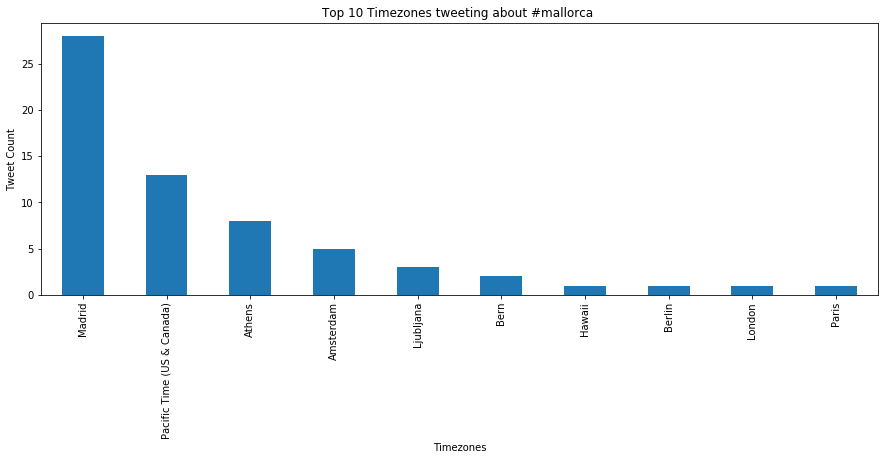

In [135]:
# Create a bar-graph figure of the specified size
plot.rcParams['figure.figsize'] = (15, 5)

# Plot the Time Zone data as a bar-graph
tzs.plot(kind='bar')


# Assign labels and title to the graph to make it more presentable
plot.xlabel('Timezones')
plot.ylabel('Tweet Count')
plot.title('Top 10 Timezones tweeting about %s ' %hashtag)